<a href="https://colab.research.google.com/github/Jhames01/Checkpoint/blob/master/MentalHealth_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_excel('Cleaned Data.xlsx')
df.head()

I am currently employed at least part-time  \
0                                           0   
1                                           1   
2                                           1   
3                                           0   
4                                           1   

   I identify as having a mental illness                Education  \
0                                      0       High School or GED   
1                                      1                 Some Phd   
2                                      0  Completed Undergraduate   
3                                      0       Some Undergraduate   
4                                      1  Completed Undergraduate   

   I have my own computer separate from a smart phone  \
0                                                  0    
1                                                  1    
2                                                  1    
3                                                  1    
4                                                  1    

   I have been hospitalized before for my mental illness  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  1       

   How many days were you hospitalized for your mental illness  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                NaN             
4                                               35.0             

   I am legally disabled  I have my regular access to the internet  \
0                      0                                         1   
1                      0                                         1   
2                      0                                         1   
3                      0                                         1   
4                      1                                         1   

   I live with my parents  I have a gap in my resume  ...  Obsessive thinking  \
0                       0                          1  ...                 1.0   
1                       0                          0  ...                 0.0   
2                       0                          0  ...                 0.0   
3                       1                          1  ...                 0.0   
4                       0                          1  ...                 1.0   

   Mood swings  Panic attacks  Compulsive behavior  Tiredness    Age  Gender  \
0          0.0            1.0                  0.0        0.0  30-44    Male   
1          0.0            1.0                  0.0        1.0  18-29    Male   
2          0.0            0.0                  0.0        0.0  30-44    Male   
3          0.0            0.0                  0.0        0.0  30-44    Male   
4          1.0            1.0                  1.0        1.0  30-44    Male   

    Household Income              Region               Device Type  
0    $25,000-$49,999            Mountain    Android Phone / Tablet  
1    $50,000-$74,999  East South Central    MacOS Desktop / Laptop  
2  $150,000-$174,999             Pacific    MacOS Desktop / Laptop  
3    $25,000-$49,999         New England  Windows Desktop / Laptop  
4    $25,000-$49,999  East North Central        iOS Phone / Tablet  

[5 rows x 31 columns]

In [ ]:
# check for null values
df.isnull().sum()

I am currently employed at least part-time                       0
I identify as having a mental illness                            0
Education                                                        0
I have my own computer separate from a smart phone               0
I have been hospitalized before for my mental illness            0
How many days were you hospitalized for your mental illness     37
I am legally disabled                                            0
I have my regular access to the internet                         0
I live with my parents                                           0
I have a gap in my resume                                        0
Total length of any gaps in my resume in months.                 0
Annual income (including any social welfare programs) in USD     0
I am unemployed                                                  0
I read outside of work and school                                0
Annual income from social welfare programs                    

In [ ]:
#Replace null values with mode
df = df.fillna(df.mode().iloc[0])

In [ ]:
df.isnull().sum()

I am currently employed at least part-time                      0
I identify as having a mental illness                           0
Education                                                       0
I have my own computer separate from a smart phone              0
I have been hospitalized before for my mental illness           0
How many days were you hospitalized for your mental illness     0
I am legally disabled                                           0
I have my regular access to the internet                        0
I live with my parents                                          0
I have a gap in my resume                                       0
Total length of any gaps in my resume in months.                0
Annual income (including any social welfare programs) in USD    0
I am unemployed                                                 0
I read outside of work and school                               0
Annual income from social welfare programs                      0
I receive 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   I identify as having a mental illness                         334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   334 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

In [ ]:
df.describe()

I am currently employed at least part-time  \
count                                  334.000000   
mean                                     0.679641   
std                                      0.467315   
min                                      0.000000   
25%                                      0.000000   
50%                                      1.000000   
75%                                      1.000000   
max                                      1.000000   

       I identify as having a mental illness  \
count                             334.000000   
mean                                0.239521   
std                                 0.427431   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       I have my own computer separate from a smart phone  \
count                                         334.000000    
mean                                            0.874251    
std                                             0.332063    
min                                             0.000000    
25%                                             1.000000    
50%                                             1.000000    
75%                                             1.000000    
max                                             1.000000    

       I have been hospitalized before for my mental illness  \
count                                         334.000000       
mean                                            0.077844       
std                                             0.268328       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                             1.000000       

       How many days were you hospitalized for your mental illness  \
count                                         334.000000             
mean                                            2.913174             
std                                            13.357915             
min                                             0.000000             
25%                                             0.000000             
50%                                             0.000000             
75%                                             0.000000             
max                                           100.000000             

       I am legally disabled  I have my regular access to the internet  \
count             334.000000                                334.000000   
mean                0.098802                                  0.964072   
std                 0.298844                                  0.186390   
min                 0.000000                                  0.000000   
25%                 0.000000                                  1.000000   
50%                 0.000000                                  1.000000   
75%                 0.000000                                  1.000000   
max                 1.000000                                  1.000000   

       I live with my parents  I have a gap in my resume  \
count              334.000000                 334.000000   
mean                 0.110778                   0.245509   
std                  0.314328                   0.431034   
min                  0.000000                   0.000000   
25%                  0.000000                   0.000000   
50%                  0.000000                   0.000000   
75%                  0.000000                   0.000000   
max                  1.000000                   1.000000   

       Total length of any gaps in my resume in months.  ...  \
count                                        334.000000  ...   
me

In [ ]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=8f0cf2cc9c7c13a607f1b01e0b9b826eee19218ed3933c5461aef9ffa29d83ea
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.loc[df['Education'] == 'High School or GED', 'Education'] = 'Highschool(Secondary School)'
df.loc[df['Education'] == 'Some Phd', 'Education'] = 'Phd'
df.loc[df['Education'] == 'Some College', 'Education'] = 'College'
df.loc[df['Education'] == 'Some Undergraduate', 'Education'] = 'Undergraduate'

df.head()

I am currently employed at least part-time  \
0                                           0   
1                                           1   
2                                           1   
3                                           0   
4                                           1   

   I identify as having a mental illness                     Education  \
0                                      0  Highschool(Secondary School)   
1                                      1                           Phd   
2                                      0       Completed Undergraduate   
3                                      0                 Undergraduate   
4                                      1       Completed Undergraduate   

   I have my own computer separate from a smart phone  \
0                                                  0    
1                                                  1    
2                                                  1    
3                                                  1    
4                                                  1    

   I have been hospitalized before for my mental illness  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  1       

   How many days were you hospitalized for your mental illness  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                               35.0             

   I am legally disabled  I have my regular access to the internet  \
0                      0                                         1   
1                      0                                         1   
2                      0                                         1   
3                      0                                         1   
4                      1                                         1   

   I live with my parents  I have a gap in my resume  ...  Obsessive thinking  \
0                       0                          1  ...                 1.0   
1                       0                          0  ...                 0.0   
2                       0                          0  ...                 0.0   
3                       1                          1  ...                 0.0   
4                       0                          1  ...                 1.0   

   Mood swings  Panic attacks  Compulsive behavior  Tiredness    Age  Gender  \
0          0.0            1.0                  0.0        0.0  30-44    Male   
1          0.0            1.0                  0.0        1.0  18-29    Male   
2          0.0            0.0                  0.0        0.0  30-44    Male   
3          0.0            0.0                  0.0        0.0  30-44    Male   
4          1.0            1.0                  1.0        1.0  30-44    Male   

    Household Income              Region               Device Type  
0    $25,000-$49,999            Mountain    Android Phone / Tablet  
1    $50,000-$74,999  East South Central    MacOS Desktop / Laptop  
2  $150,000-$174,999             Pacific    MacOS Desktop / Laptop  
3    $25,000-$49,999         New England  Windows Desktop / Laptop  
4    $25,000-$49,999  East North Central        iOS Phone / Tablet  

[5 rows x 31 columns]

In [ ]:
#renaming Columns
df.rename(columns={'I identify as having a mental illness':'MentallyIll'}, inplace =True)
df.rename(columns={'I am unemployed':'Unemployed'}, inplace =True)

df.head()

I am currently employed at least part-time  MentallyIll  \
0                                           0            0   
1                                           1            1   
2                                           1            0   
3                                           0            0   
4                                           1            1   

                      Education  \
0  Highschool(Secondary School)   
1                           Phd   
2       Completed Undergraduate   
3                 Undergraduate   
4       Completed Undergraduate   

   I have my own computer separate from a smart phone  \
0                                                  0    
1                                                  1    
2                                                  1    
3                                                  1    
4                                                  1    

   I have been hospitalized before for my mental illness  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  1       

   How many days were you hospitalized for your mental illness  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                               35.0             

   I am legally disabled  I have my regular access to the internet  \
0                      0                                         1   
1                      0                                         1   
2                      0                                         1   
3                      0                                         1   
4                      1                                         1   

   I live with my parents  I have a gap in my resume  ...  Obsessive thinking  \
0                       0                          1  ...                 1.0   
1                       0                          0  ...                 0.0   
2                       0                          0  ...                 0.0   
3                       1                          1  ...                 0.0   
4                       0                          1  ...                 1.0   

   Mood swings  Panic attacks  Compulsive behavior  Tiredness    Age  Gender  \
0          0.0            1.0                  0.0        0.0  30-44    Male   
1          0.0            1.0                  0.0        1.0  18-29    Male   
2          0.0            0.0                  0.0        0.0  30-44    Male   
3          0.0            0.0                  0.0        0.0  30-44    Male   
4          1.0            1.0                  1.0        1.0  30-44    Male   

    Household Income              Region               Device Type  
0    $25,000-$49,999            Mountain    Android Phone / Tablet  
1    $50,000-$74,999  East South Central    MacOS Desktop / Laptop  
2  $150,000-$174,999             Pacific    MacOS Desktop / Laptop  
3    $25,000-$49,999         New England  Windows Desktop / Laptop  
4    $25,000-$49,999  East North Central        iOS Phone / Tablet  

[5 rows x 31 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   MentallyIll                                                   334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   334 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

In [ ]:
columns_to_drop = ['Device Type', 'Household Income', 'I am on section 8 housing', 'I receive food stamps', 'Annual income from social welfare programs', 'I read outside of work and school', 'Annual income (including any social welfare programs) in USD', 'How many days were you hospitalized for your mental illness', 'I have my own computer separate from a smart phone']
df.drop(columns=columns_to_drop, inplace= True) # Remove inplace=True

df.info() # Use df instead of df_dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 22 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   MentallyIll                                                   334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have been hospitalized before for my mental illness         334 non-null    int64  
 4   I am legally disabled                                         334 non-null    int64  
 5   I have my regular access to the internet                      334 non-null    int64  
 6   I live with my parents                                        334 non-null    int64  
 7   I have a gap in my resume                                     334 non-n

<Axes: xlabel='count', ylabel='Education'>

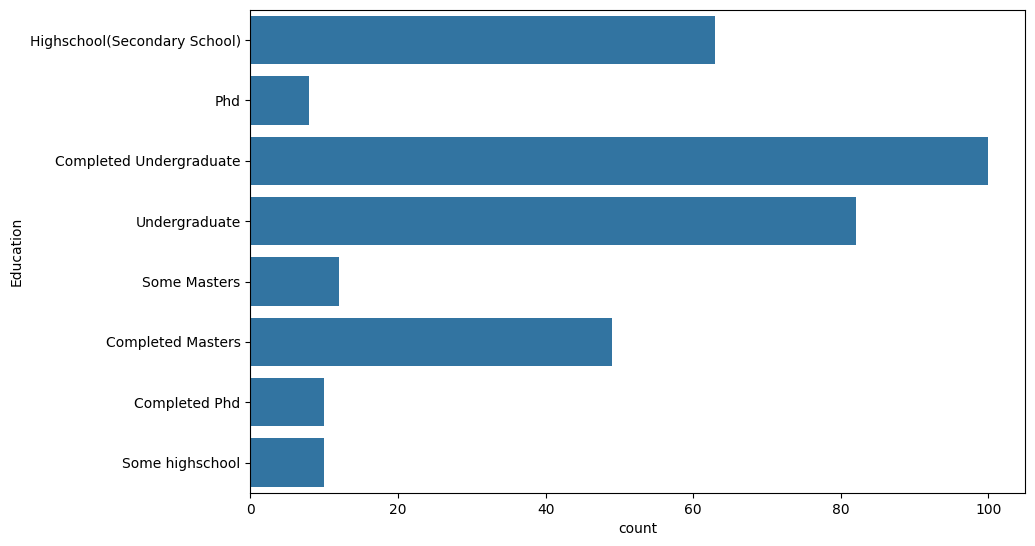

In [ ]:
a4_dims = (10, 6.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(df.Education)
#sns.countplot(ill)

In [ ]:
df

I am currently employed at least part-time  MentallyIll  \
0                                             0            0   
1                                             1            1   
2                                             1            0   
3                                             0            0   
4                                             1            1   
..                                          ...          ...   
329                                           0            0   
330                                           1            0   
331                                           1            0   
332                                           0            1   
333                                           1            1   

                        Education  \
0    Highschool(Secondary School)   
1                             Phd   
2         Completed Undergraduate   
3                   Undergraduate   
4         Completed Undergraduate   
..                            ...   
329  Highschool(Secondary School)   
330                 Undergraduate   
331                 Undergraduate   
332                 Undergraduate   
333                 Undergraduate   

     I have been hospitalized before for my mental illness  \
0                                                    0       
1                                                    0       
2                                                    0       
3                                                    0       
4                                                    1       
..                                                 ...       
329                                                  0       
330                                                  0       
331                                                  0       
332                                                  1       
333                                                  0       

     I am legally disabled  I have my regular access to the internet  \
0                        0                                         1   
1                        0                                         1   
2                        0                                         1   
3                        0                                         1   
4                        1                                         1   
..                     ...                                       ...   
329                      1                                         1   
330                      0                                         1   
331                      0                                         1   
332                      1                                         1   
333                      1                                         1   

     I live with my parents  I have a gap in my resume  \
0                         0                          1   
1                         0                          0   
2                         0                          0   
3                         1                          1   
4                         0                          1   
..                      ...                        ...   
329                       0                          0   
330                       1                          0   
331                       0                          0   
332                       1                          1   
333                       0                          0   

     Total length of any gaps in my resume in months.  Unemployed  ...  \
0                                                  24           1  ...   
1                                                   1           0  ...   
2                                                   0           0  ...   
3                                                  11           1  ...   
4                                                  33           0  ...   
..                                      

In [ ]:
df.drop(columns='Region', inplace= True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 21 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   MentallyIll                                                   334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have been hospitalized before for my mental illness         334 non-null    int64  
 4   I am legally disabled                                         334 non-null    int64  
 5   I have my regular access to the internet                      334 non-null    int64  
 6   I live with my parents                                        334 non-null    int64  
 7   I have a gap in my resume                                     334 non-n

In [ ]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Education', 'Age', 'Gender']

# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

df

I am currently employed at least part-time  MentallyIll  Education  \
0                                             0            0          3   
1                                             1            1          4   
2                                             1            0          2   
3                                             0            0          7   
4                                             1            1          2   
..                                          ...          ...        ...   
329                                           0            0          3   
330                                           1            0          7   
331                                           1            0          7   
332                                           0            1          7   
333                                           1            1          7   

     I have been hospitalized before for my mental illness  \
0                                                    0       
1                                                    0       
2                                                    0       
3                                                    0       
4                                                    1       
..                                                 ...       
329                                                  0       
330                                                  0       
331                                                  0       
332                                                  1       
333                                                  0       

     I am legally disabled  I have my regular access to the internet  \
0                        0                                         1   
1                        0                                         1   
2                        0                                         1   
3                        0                                         1   
4                        1                                         1   
..                     ...                                       ...   
329                      1                                         1   
330                      0                                         1   
331                      0                                         1   
332                      1                                         1   
333                      1                                         1   

     I live with my parents  I have a gap in my resume  \
0                         0                          1   
1                         0                          0   
2                         0                          0   
3                         1                          1   
4                         0                          1   
..                      ...                        ...   
329                       0                          0   
330                       1                          0   
331                       0                          0   
332                       1                          1   
333                       0                          0   

     Total length of any gaps in my resume in months.  Unemployed  ...  \
0                                                  24           1  ...   
1                                                   1           0  ...   
2                                                   0           0  ...   
3                                                  11           1  ...   
4                                                  33           0  ...   
..                                                ...         ...  ...   
329                                                 0           1  ...   
330                                                 0           0  ...   
331                                                 0           0  ...   
332                                                30    

**MACHINE LEARNING**

In [ ]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#features extraction
x = df.drop(columns=['MentallyIll']) # Features
y = df['MentallyIll'] # target variable


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)#splitting data with test size of 25%


In [ ]:
y_train.value_counts()

MentallyIll
0    190
1     60
Name: count, dtype: int64

In [ ]:
x_train.shape

(250, 20)

**USE THIS**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report
import numpy as np

# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Train the logistic regression model with class weights
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(x_train_resampled, y_train_resampled)

# Get predicted probabilities
y_pred_prob = logreg.predict_proba(x_test)[:, 1]

# Find the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(recall - (1 - precision))
optimal_threshold = thresholds[optimal_idx]

# Apply the optimal threshold
y_pred_adjusted = (y_pred_prob >= optimal_threshold).astype(int)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        64
           1       0.77      0.85      0.81        20

    accuracy                           0.90        84
   macro avg       0.86      0.89      0.87        84
weighted avg       0.91      0.90      0.91        84



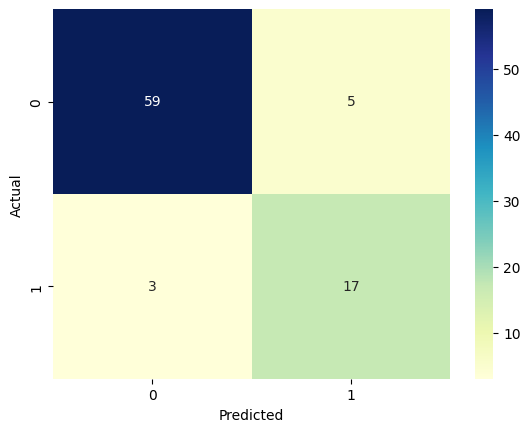

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**IMPROVE RECALL CLASS 1**

**Oversampling Minority Class (SMOTE)**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Train the model with the resampled data
model = LogisticRegression(class_weight='balanced', random_state=0)
model.fit(x_train_smote, y_train_smote)
y_pred = model.predict(x_test)

print("After SMOTE")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

After SMOTE
Accuracy: 0.8928571428571429
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        64
           1       0.74      0.85      0.79        20

    accuracy                           0.89        84
   macro avg       0.84      0.88      0.86        84
weighted avg       0.90      0.89      0.90        84



**Using XGBClassifier to Boost The Algorithm**

In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, classification_report, accuracy_score
import numpy as np

# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Train the XGBClassifier with balanced class weights
scale_pos_weight = (len(y_train_resampled) - np.sum(y_train_resampled)) / np.sum(y_train_resampled)
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb.fit(x_train_resampled, y_train_resampled)

# Get predicted probabilities for the test set
y_pred_prob = xgb.predict_proba(x_test)[:, 1]

# Find the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(recall - (1 - precision))
optimal_threshold = thresholds[optimal_idx]

# Apply the optimal threshold to get final predictions
y_pred_adjusted = (y_pred_prob >= optimal_threshold).astype(int)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))



Accuracy: 0.9404761904761905
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.86      0.90      0.88        20

    accuracy                           0.94        84
   macro avg       0.91      0.93      0.92        84
weighted avg       0.94      0.94      0.94        84



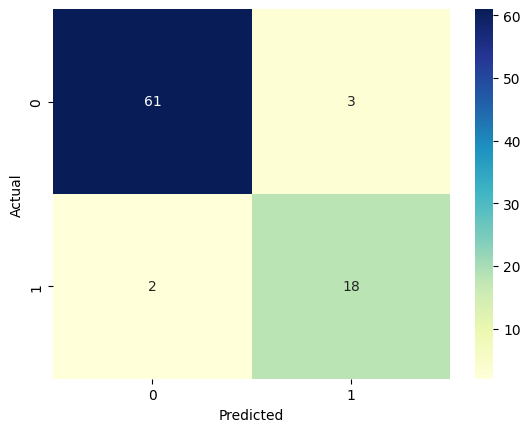

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()